In [1]:
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt
import scipy
import tqdm.auto as tqdm
import scipy.stats as st

XM = 5

In [2]:
def draw_pareto(num_samples: int, alpha: float, xm: float) -> np.ndarray:
    
    return (1 + np.random.pareto(a = alpha, size = num_samples)) * xm

def plot_histogram(data: np.ndarray, num_bins):
    
    plt.hist(data, bins = num_bins, density = False)
    plt.show()
    
def get_one_point_likelihood(x: float, xm: float) -> Callable:
    
    return lambda alpha: 0 if x < xm else np.log((alpha * xm**alpha)/(x**(alpha + 1)))

def get_sample_likelihood(sample: np.ndarray, xm: float) -> Callable:
    
    sum_likelihood = lambda alpha: np.sum([get_one_point_likelihood(x=x, xm = xm)(alpha = alpha) for x in sample])
    return sum_likelihood 

def get_maximum_likelihood_alpha(sample, initial, xm) -> float:
    
    negative_likelihood_func = lambda alpha: - (get_sample_likelihood(sample, xm = xm))(alpha = alpha)
    best_alpha = scipy.optimize.fmin(negative_likelihood_func, x0 = initial, maxiter = 1000000)
    return best_alpha


def plot_sample_likelihood_by_alpha(sample, xm):
    
    alphas = np.arange(0.05, 20, 0.05)
    likelihoods = []
    for alpha in tqdm.tqdm(alphas):
        
        likelihoods.append(get_sample_likelihood(sample, xm = xm)(alpha = alpha))

    plt.plot(alphas, likelihoods)
    plt.xlabel("alpha")
    plt.ylabel("log-likelihood")
    plt.show()

def calc_confidence_interval(xm, alpha, n = 100):
    
    alphas = []
    for i in tqdm.tqdm(range(n)):
        
        sample = draw_pareto(1000, alpha = alpha, xm = xm)
        alpha_max = get_maximum_likelihood_alpha(sample, initial = 6.96, xm = xm)
        alphas.append(alpha_max.item())
        
    # confidence = 0.95
    
    interval95 = st.t.interval(0.95, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
   
    # confidence = 0.99
    
    interval99 = st.t.interval(0.99, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
    
    print("conf-95: {}, conf-99: {}".format(interval95, interval99))
    
    return interval95, interval99


def plot_confidence(n, xm, alpha):
    
    def draw(confs, title):
        plt.axhline(y=alpha, linestyle='--')
        for i, val in enumerate(confs):
            plt.vlines(i,ymin=val[0],ymax=val[1])
        plt.ylim((6.75,7.25))
        plt.title(title)
        plt.show()
    
    confs95, confs99 = [], []
    for i in range(100):
        conf95, conf99 = calc_confidence_interval(xm, alpha, n = n)
        confs95.append(conf95)
        confs99.append(conf99)

    draw(confs95, "0.95 confidence")
    draw(confs99, "0.99 confidence")
    


We first draw n = 1000 samples from pareto distribution, and plot a histogram.

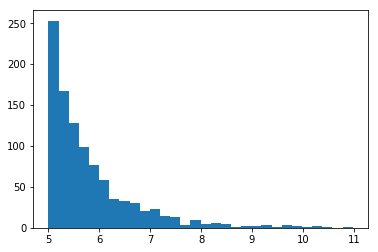

In [10]:
sample = draw_pareto(1000, alpha = 7, xm = XM)
plot_histogram(data = sample, num_bins = 30)

Next, we calcualte the sample maximum likelihood. As can be seen, the value is close to the real value of 7:

In [15]:
one_point_likelihood = get_one_point_likelihood(x = 5.5, xm = XM)
sample_likelihood  = get_sample_likelihood(sample, xm = XM)
print(get_maximum_likelihood_alpha(sample, initial = 6, xm = XM))


Optimization terminated successfully.
         Current function value: 790.639738
         Iterations: 15
         Function evaluations: 30
[7.09716797]


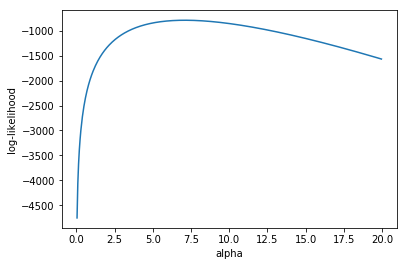

In [12]:
plot_sample_likelihood_by_alpha(sample, xm = XM)

As can be seen, the function is maximized around alpha = 7.

In [13]:
calc_confidence_interval(xm=XM, alpha = 7, n = 1000)

Optimization terminated successfully.
         Current function value: 830.191513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.545284
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 742.722022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.005857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.778560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.152431
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.094492
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 766.191898
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 753.757310
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.247127
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.314806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 711.721253
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 797.733883
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 750.334932
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 791.040794
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.277807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.716490
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 765.344633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.827255
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 754.253346
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 862.504821
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 805.670880
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.368954
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.898672
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.428000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 730.362577
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 856.560909
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 796.923293
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 780.773067
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.863191
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.833828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.218756
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 876.850052
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 851.172997
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 859.912538
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 828.592925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.077358
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.371262
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 828.856094
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.401843
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.957950
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.229026
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 829.423794
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.451691
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 747.967102
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 876.012224
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 775.654052
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.370071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.572057
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 794.811775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.968554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.847610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.924997
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.046563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.472477
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 742.812788
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 800.420036
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.552381
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.407327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.783138
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.792085
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 872.726901
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 738.863746
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 845.648371
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 758.272291
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.134895
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.130466
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.917730
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.441547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.427476
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 778.863027
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.600779
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.627074
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.802795
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.957762
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.538902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.861703
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 811.872310
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 731.761315
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.560670
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.110836
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 750.524529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 742.784662
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.206386
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 828.661085
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.613013
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.569679
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.284971
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.177865
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.851185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.244394
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 828.865581
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.966817
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.756667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.808404
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.639369
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.736007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.105893
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 841.957230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 737.305663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.420830
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.186132
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.573480
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.173921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.489963
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 812.322823
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.345279
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.976721
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.212426
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 878.594843
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 746.007121
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.145870
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 801.904224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.456826
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.145088
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.293264
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.327145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.081988
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.126622
         Iterations: 14
         Function evaluations: 28
Optimization termina

((6.989289383136479, 7.016993376629146),
 (6.984924023318451, 7.021358736447175))

The 0.95 and 0.99 confidence values are both centered around 7.

Optimization terminated successfully.
         Current function value: 790.549409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.268996
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.296387
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 822.115129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.634592
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 842.917635
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 770.024059
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 799.832465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 745.170769
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.420045
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.577853
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 801.196947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.075663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.216674
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 786.423302
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.069152
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.138589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.066122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.366054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.467563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.189129
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 850.741111
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 808.534486
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.610049
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.245307
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 825.108678
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.947475
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.383556
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 823.484827
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.111523
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.882920
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.673165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.073490
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.711948
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.090240
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 871.276554
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 776.781709
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.972386
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.656388
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.827801
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.393328
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.681798
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 747.818589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 876.342305
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 812.947330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.259873
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.085584
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.709133
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.221930
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 736.525549
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.684532
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.845498
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.653538
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.400282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 736.689666
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 742.215821
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 789.532468
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.525920
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.948660
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 753.754009
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.533957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.816144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 868.764806
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 837.254858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.103994
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.470315
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.632382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.179269
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.682065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 746.334195
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 725.175342
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 820.820645
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.030369
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 723.695145
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 866.532455
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 877.426060
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 815.916299
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 794.620747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 743.890949
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.193325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.914921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 765.771478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.166099
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 872.971712
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 750.259325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.352808
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.283485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.080097
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 859.748846
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 821.641300
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.796605
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 817.730606
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.356864
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.507471
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.110254
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.124154
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.965579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.492571
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 761.048203
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.477521
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.905726
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.529216
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.714283
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.206801
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.897909
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 775.458323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.063451
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.627697
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.759800
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.926043
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 729.629241
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 798.021110
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 767.975266
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.169203
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.099660
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.413026
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.253818
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.614081
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 832.923664
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 798.365863
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.491320
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.036362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.840510
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.485276
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.556648
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 881.406931
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 848.049148
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 849.646469
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 852.703026
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 806.024773
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.713521
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.044700
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.958357
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 762.113262
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.100190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.387795
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 748.434486
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.580716
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.172905
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.443319
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 847.865157
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.174304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.622663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.272237
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 792.743753
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.501603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.232155
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 826.319663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.565993
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 777.255492
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.860882
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.243145
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 773.761818
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.186976
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 828.624226
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.676682
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 690.333929
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 749.149156
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.348727
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 764.278029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.499435
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 823.887778
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.396890
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 800.356392
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.365079
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.000166
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.616517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.858274
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 841.744286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 753.539824
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.116143
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.639164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 870.386752
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 809.453365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.493148
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 781.912298
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.444800
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.286691
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.129679
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 800.006637
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.440968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.582223
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 780.871211
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.460050
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.126202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 748.766084
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.420361
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.658815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.389799
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 736.452958
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.557397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.129188
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.127049
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.011180
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 902.621853
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 862.203524
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 756.411051
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.549718
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 748.349339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.172471
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 746.534296
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.751862
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.379769
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 764.159932
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.611569
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.967666
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.262881
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.388934
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.671820
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.548770
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 798.256767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.836341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.980553
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.894618
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.022154
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.933371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.313850
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 830.103782
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.920603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.906931
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 793.155871
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.571429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.453856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.451980
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 797.899339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.188796
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.550856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.901960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.703518
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.418771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.745978
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 773.788170
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.256688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.752960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.082537
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.968110
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.181192
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.705115
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 828.524919
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.069520
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.001349
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.760041
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.303554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.336140
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.577314
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 762.557007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.037697
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 831.390047
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.495044
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.577796
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.321394
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.082547
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 801.598385
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.351870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.466226
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 814.683168
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.701727
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.298996
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.212214
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 808.317696
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.470734
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 857.428496
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 854.183354
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 837.124463
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.200804
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 802.820026
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 785.788365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.183778
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.986250
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.700061
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.268573
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.760458
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 819.936506
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 779.983291
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.704328
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.841791
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.295076
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.164118
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.706289
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.899623
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 842.072671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.268029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.616978
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.501168
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 789.871192
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.093078
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 809.408711
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 807.646369
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.698664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.366094
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.039778
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.393185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.808192
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.498296
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 803.796117
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.582866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.041766
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 889.504637
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 786.689169
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.992014
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.512047
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 820.185941
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.469992
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.297861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.481014
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.168604
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 741.465090
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.822353
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 763.514887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.195722
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 834.129833
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.029117
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 852.108069
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 796.167849
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 765.252409
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 804.797151
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.701580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.237680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.954194
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.673263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 861.296296
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 817.227200
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 829.573705
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.034704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 895.171909
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 821.413325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 750.506571
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 880.263179
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 843.652228
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 821.860860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 877.189204
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 843.563549
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 787.159161
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 746.796631
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.545808
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 859.892952
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 810.516630
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.462846
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.227593
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.651200
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 865.931346
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 766.319784
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.372323
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 807.529010
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.981816
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.898585
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.054778
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.418467
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.482345
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.487521
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 810.229583
         Iterations: 13
         Function evaluations: 26

conf-95: (6.965758293836149, 7.017384674913849), conf-99: (6.957567530654426, 7.025575438095572)


Optimization terminated successfully.
         Current function value: 881.447537
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 742.171442
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.684805
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.868309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.479381
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.872252
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.821880
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 789.524640
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.654527
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.047748
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 742.230326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.405281
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.914979
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.602623
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 807.260499
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.967946
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.334503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.104007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.855376
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.370549
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.629927
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 783.247768
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.577659
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.421240
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.629692
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.077524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 744.509032
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.705301
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 787.644761
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.435434
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 752.508117
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.471395
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.092046
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.222601
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.643534
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 814.850105
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.310319
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.767664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.336489
         Iterations: 13
         Function evaluations: 26

conf-95: (6.9995282401295755, 7.049974884870426), conf-99: (6.991524647552304, 7.057978477447697)


Optimization terminated successfully.
         Current function value: 707.461693
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 817.338246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 869.309100
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 795.478033
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.955269
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.427418
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.453142
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 829.767196
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.380394
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.261696
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.063166
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.995609
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.162969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.754140
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 811.784859
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.748472
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 812.551375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.633283
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 858.023191
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 799.428263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.028300
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 780.577673
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.149414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.357373
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 744.478118
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.353904
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.329495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 697.690462
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 810.855433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 726.985581
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 836.585113
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.497280
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.734631
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.969149
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.002725
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 819.811553
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.146943
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.558722
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 802.842664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.597895
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.770821
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.800694
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 819.791024
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 739.965996
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.863606
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.751866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.342827
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.176421
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.880097
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 803.496414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.329593
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 741.200101
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 728.127639
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 843.917588
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 789.203644
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.419066
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 813.882778
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.601438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 882.211404
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 846.731419
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 808.642600
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.154572
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.876838
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 838.979584
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.934721
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.822733
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.335294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.627773
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.166218
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.628727
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 819.857699
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.310085
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 784.924835
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.304378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.330602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.213946
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.061669
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 803.716306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.436987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.858224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.344247
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.242865
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.455273
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.138244
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 805.992042
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.681257
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.682936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.918733
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.686936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.368674
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 785.170260
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 835.107336
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 744.375556
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.333376
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.155044
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.495943
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.506832
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.914016
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 827.946546
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.743222
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.555002
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.993160
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.536180
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.864529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.326429
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 815.365400
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 743.085413
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.765281
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.245684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.768813
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 774.180963
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.853276
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 810.671389
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.599889
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.136317
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 739.138301
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.681515
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 856.965013
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 817.387141
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 729.009908
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 739.945348
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.060242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.277429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.272278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.814236
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 876.900286
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 790.158457
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.017724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.957754
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.948105
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 792.041941
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.917524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.352117
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 840.630764
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.174695
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.613429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.578945
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.661063
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.897987
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 761.313319
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 768.164756
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.949842
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.126891
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.984484
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.427902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.136640
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.866920
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 795.062403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.399297
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.370476
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.402745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.704089
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.422964
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.440147
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 763.981284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.533367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 871.228312
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 847.459420
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 782.661010
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.846556
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.771738
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 814.522317
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.393623
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.067958
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.189762
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.119680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.611226
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.084109
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 808.921648
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.914222
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.788778
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.583526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.015042
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.737537
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.979836
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 779.969758
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.870309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.593417
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.827505
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 746.697952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.498876
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.259807
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 815.681052
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 862.025190
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 723.301926
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 783.857177
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.862592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.317482
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.272672
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 807.157688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.089539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.627956
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.938515
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 889.209598
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 760.801361
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.854958
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 781.277842
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.330112
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.393473
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.760247
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.742105
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 844.511423
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 808.959808
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 783.896006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.236860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 886.663313
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 827.998779
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.626165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.585326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.688480
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 793.032224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.005142
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.853056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.379789
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.223611
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 832.991220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.185730
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 784.366037
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.381281
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.808290
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.264618
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.876143
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.837444
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 867.193251
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 848.036052
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 827.155513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.129836
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.418028
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.210066
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.196403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.370150
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 810.794093
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.952370
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 775.433495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 734.574300
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.177667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.479482
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.518868
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 791.830862
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.455585
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.205851
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.934707
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.738758
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.581335
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.215303
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 830.220321
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.873278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.218318
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 736.050886
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.042328
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.498722
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.950527
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 816.095884
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.845966
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.629505
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.025864
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 874.084681
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 786.846576
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.003034
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 819.066045
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.291874
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.631829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.971221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.053612
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.784497
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 869.096832
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 817.958898
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 742.462952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.916158
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.567481
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 764.756611
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.352547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.374745
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 826.012229
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.732463
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 683.300201
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 860.380915
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 777.556408
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 885.063170
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 775.851651
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 841.298690
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 859.178288
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 806.228341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.390291
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.598993
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 876.870330
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 855.414377
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 806.401651
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.778902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.869285
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.088007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.986960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.410667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.094071
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 814.770886
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.900318
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.714790
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.777343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.674304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.780025
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.354005
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 813.739757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 741.266138
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.285549
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 739.867630
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 859.334917
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 708.765699
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 848.363331
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 840.516871
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.818288
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.170591
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.667503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.146884
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.065962
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.608584
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 776.751681
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.624734
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 713.363975
         Iterations: 14
         Function evaluations: 28

conf-95: (6.9990993364598335, 7.049437499477669), conf-99: (6.991112955007654, 7.057423880929849)


Optimization terminated successfully.
         Current function value: 788.533919
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.847969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.467462
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.352177
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.576126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 752.101892
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.736814
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 857.595324
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 756.189487
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.707754
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.771835
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 831.465298
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.735228
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 750.048894
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 789.874766
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.741039
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.339894
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.160211
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.428147
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 765.893597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.914770
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 802.436009
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.958641
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.685380
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 756.064974
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 714.080817
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 841.760809
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.080427
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 751.122683
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.607113
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 840.316589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.212937
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.869102
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.313386
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 836.761097
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 823.369474
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.928569
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.177973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.751784
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.540825
         Iterations: 13
         Function evaluations: 26

conf-95: (6.9574989993587355, 7.0083368600162625), conf-99: (6.949433338574096, 7.016402520800902)


Optimization terminated successfully.
         Current function value: 813.716554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.977693
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.500634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.386353
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.474831
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 720.008072
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 764.030365
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 760.290132
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.453813
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.907739
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 731.784607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.813985
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 790.299105
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.700762
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 749.156598
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.531646
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.536448
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.650752
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.541212
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 883.592332
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 794.311988
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 737.587240
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.872762
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.373306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 872.451196
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 769.792566
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.358470
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.217367
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 804.145615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.626005
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.520611
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 745.721764
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.579655
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.019221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.161824
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 846.275821
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 800.906589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.595964
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.364331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.095060
         Iterations: 13
         Function evaluations: 26

conf-95: (6.974623382263729, 7.02576269195502), conf-99: (6.966509895201218, 7.033876179017531)


Optimization terminated successfully.
         Current function value: 861.022646
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 803.775597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.077781
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 718.550653
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 800.027368
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.455088
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.812728
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 832.686265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.803429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.640189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.994595
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.020709
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 859.727197
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 793.107244
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 821.475202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.185656
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.307158
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.229272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.853607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.338455
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 818.125360
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 763.795602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.549481
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.586189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 723.531133
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 811.770979
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.919350
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.627713
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 809.436330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.591012
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.303861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.752419
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.126453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.291297
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 738.832793
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 809.519912
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.787022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.555698
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.123727
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.646669
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.916844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.489044
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 793.366040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.220930
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.508672
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 759.807450
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.640772
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 745.986941
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.680571
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 794.088755
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.419616
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.411052
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.141806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 879.124859
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 847.855910
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 858.883104
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 786.933164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.974581
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.849476
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 748.385638
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.513016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.728101
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.956258
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 866.349322
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 812.373819
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.846230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.162933
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 711.302553
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 774.364828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 724.232452
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 884.213301
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 827.555806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.891561
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 767.988694
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.325182
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 878.030196
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 824.248778
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 808.060355
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.008724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.526173
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.461551
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.594059
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 745.319230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.830900
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 819.721297
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.424583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.882908
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.518695
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 852.843208
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 796.123213
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.730995
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 824.916587
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.482494
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 856.914456
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 826.562503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.708988
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.345672
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.000345
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 808.130744
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.206609
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.525633
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 826.497570
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.250184
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.183807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.105117
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 802.245218
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.347043
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.669907
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.655165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.655818
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.184724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 737.314423
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 835.918685
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.416983
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.784817
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.331566
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.407938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.859839
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 825.876834
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 868.440411
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 844.663971
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 759.340367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.203841
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.076000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 859.633420
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 835.883314
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 802.399608
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.031902
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 801.839844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.486107
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.102762
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.180558
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.626378
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 782.103517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.079682
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.748926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.324414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.532890
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.418907
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.220393
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 745.374052
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.388159
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.308092
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.378502
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 715.129422
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 804.545533
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 744.472305
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 842.180857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.956574
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.584393
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.682970
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.173615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.986519
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.582148
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 813.789515
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 892.111276
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 800.704475
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.282736
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.771322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.429484
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 861.372540
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 798.894337
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.420689
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 873.539687
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 777.315402
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.378682
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.043030
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.396101
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 819.440945
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.918383
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.931158
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.597388
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.955110
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.140934
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 765.325259
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 863.173084
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 849.238686
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 792.085502
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.240958
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.196947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.879366
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.973398
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 862.628501
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 807.988663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.576082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.130719
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 883.261393
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 779.434036
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.741488
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 812.990076
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.583656
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.627772
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 804.310399
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.007275
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 863.727776
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 797.936884
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 812.960006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.819428
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.174888
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.015276
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.491100
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.371377
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 764.677279
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 788.958308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.362522
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 746.684405
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 738.338960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.847505
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.134842
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 909.161170
         Iterations: 15
         Function evaluations: 30
Optimization termina

Optimization terminated successfully.
         Current function value: 767.814124
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.075559
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.610200
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.665007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.543423
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.796866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.783135
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 798.654852
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.352959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.573407
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.762888
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.357133
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 880.407322
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 756.803849
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 796.404129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.462141
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.829856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 879.812102
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 833.174138
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.168679
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.521706
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 801.197867
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.932085
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.922892
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.854746
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.379028
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 741.648097
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 880.746026
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 815.063503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.460698
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.103051
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 877.007947
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 814.903608
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.858757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.098956
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 855.236085
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 788.611394
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.238088
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.110004
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.252127
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.572353
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 780.812530
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 815.683347
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.173699
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.742709
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.625330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.224404
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 870.582735
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 797.242925
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 837.560694
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.817994
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.321208
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.421804
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 892.964472
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 788.782343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.006048
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 835.765380
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.007577
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.329383
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.581552
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 844.939398
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 728.991545
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 787.836501
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 764.560002
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.075262
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 892.577389
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 794.877434
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.884731
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.455264
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.789482
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 799.348801
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.045681
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.881328
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.032103
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.823454
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 722.306603
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 745.224091
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 738.639876
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.881304
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.519093
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.311652
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.358429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.063596
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.453314
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 844.932917
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 783.869176
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.093162
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.736482
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.862639
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.127603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.629069
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 840.732603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.041110
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 849.477512
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 855.002330
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 789.335390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.959362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.446038
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 834.078223
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.549615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.737000
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 818.218518
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.893606
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.559398
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.293399
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 782.684504
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 740.696998
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.813221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 902.981151
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 809.032026
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.308034
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.014473
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 848.624122
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 801.805892
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.838082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.258013
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.439145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.605745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.426731
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 825.573690
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.812980
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.967660
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.039120
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 758.421681
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.556741
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 744.519492
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 759.668742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.624793
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.892392
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.341205
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.260950
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.097256
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.017146
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 780.265687
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.360505
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.854019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.667522
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 745.739655
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.863494
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.303231
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 791.505286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.157717
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.423925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.875676
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.006097
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.387210
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.165283
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 773.594483
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.240849
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.849650
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 794.599624
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.009058
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.167248
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 862.910996
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 855.985857
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 792.509835
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.840787
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 785.887588
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.221219
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 764.648085
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.877719
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 818.834903
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.464528
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 848.635965
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 844.626009
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 859.283734
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 834.267246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 746.057539
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 776.087589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.473895
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.824024
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.838165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.686063
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.575198
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.652434
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 827.465066
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.451884
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 812.667422
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.336341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 876.711664
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 742.945466
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.598984
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 800.304138
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.460768
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.365586
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.253455
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 759.052555
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.484902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.145308
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 732.511868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.371224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.395861
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 823.362621
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 731.210571
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.368847
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.739098
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 881.246888
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 784.302594
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.856192
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.365174
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.761254
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 777.388820
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.807014
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 755.301533
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.583060
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 750.111610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.911376
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 765.446183
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.607067
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 812.840010
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 784.968089
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.436875
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 782.547369
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.476945
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 741.910995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 870.484504
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 794.464797
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 796.732491
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.705006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.865612
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 817.474089
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.602623
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.476109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.104496
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 789.869664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.663966
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 762.737126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.080003
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.835529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.724472
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.351545
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 839.086208
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.451036
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.355811
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.437185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 863.493990
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 869.310870
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 829.871539
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 781.505583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 747.429887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.513522
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.554893
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 782.357054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.153425
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.192365
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 874.263900
         Iterations: 14
         Function evaluations: 28

conf-95: (6.964129476412731, 7.015976422024767), conf-99: (6.955903719651575, 7.024202178785924)


Optimization terminated successfully.
         Current function value: 780.800512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.315205
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.294279
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.477717
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 731.362053
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.895072
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.056039
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 768.633911
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.526513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.844773
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.970894
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.447184
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.790282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 859.006314
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 806.609070
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 748.151732
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 859.724637
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 820.746355
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.598353
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.370760
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.419640
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 783.158493
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.003755
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 733.405510
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.903048
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.165825
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 752.883164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.517077
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 856.989191
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 764.860252
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.688793
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.075696
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.431136
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 793.556737
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.678946
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 798.938258
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.428325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.968656
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.471766
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.217639
         Iterations: 13
         Function evaluations: 26

conf-95: (6.9921463384304365, 7.042736142038314), conf-99: (6.9841200330394315, 7.050762447429319)


Optimization terminated successfully.
         Current function value: 821.739336
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.081225
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.320248
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.654985
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 858.467692
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 814.158706
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.202641
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 826.198098
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.169714
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.081358
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.517653
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.597468
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.628215
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.913688
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 784.540899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.650376
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.623095
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.958095
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 862.014517
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.916772
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.612120
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 827.873096
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.867403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.502205
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 841.371962
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.714853
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.040400
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.626256
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 901.004289
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 829.447968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.563198
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 863.754547
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 857.574967
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 776.828607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.614318
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 797.970325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.570094
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.878019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.110312
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.466387
         Iterations: 13
         Function evaluations: 26

conf-95: (6.964418114234692, 7.013785225609056), conf-99: (6.956585794599027, 7.021617545244721)


Optimization terminated successfully.
         Current function value: 774.739381
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 856.473493
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.366478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 877.580821
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 822.426513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.357681
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.438468
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 794.535650
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.306991
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 865.165896
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 792.524721
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.933671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.223114
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.991127
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 826.056579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.539038
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.055310
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.189278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.792441
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.669301
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.621490
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 801.516868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 859.675880
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 803.242687
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.065055
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.780032
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.979156
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 820.625377
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 803.474211
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.724157
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 759.272086
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.066355
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.575151
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.737290
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.938240
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 752.372331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.671482
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.964590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.818596
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.786535
         Iterations: 13
         Function evaluations: 26

conf-95: (6.967152019659839, 7.01196549987141), conf-99: (6.9600421545850555, 7.019075364946193)


Optimization terminated successfully.
         Current function value: 798.457355
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 865.246240
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 834.173482
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.097823
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 761.814373
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 746.768252
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.257251
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 795.390980
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.895505
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.389889
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.419707
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.477732
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.825167
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.608970
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 801.114211
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.098391
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.434417
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.786931
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.920130
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.163241
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 740.674401
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 833.415056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.080911
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.576923
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.972524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.068986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.160004
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.909752
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 806.218574
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 737.598210
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.554295
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.033901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.681250
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.468272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 743.975656
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 790.480961
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 852.843959
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 826.721297
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 875.261664
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 814.103768
         Iterations: 13
         Function evaluations: 26

conf-95: (7.020316905760661, 7.069517742676838), conf-99: (7.012510966333753, 7.077323682103746)


Optimization terminated successfully.
         Current function value: 795.481720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.558245
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.700299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.112583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.132131
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 751.225373
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.941385
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 857.143181
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 865.325545
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 793.385789
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.476947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.193656
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 859.592231
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 790.385144
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 775.803665
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 874.405864
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 796.547595
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.267940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.582703
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.302588
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.555982
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 825.528805
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.914836
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 856.600816
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 826.020730
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.605952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.290216
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 820.108453
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 840.625566
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.186227
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.114804
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 758.134401
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.338779
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.637568
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.669396
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 782.840038
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.972675
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.942384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.865892
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.866886
         Iterations: 13
         Function evaluations: 26

conf-95: (6.973643865446255, 7.023082091584993), conf-99: (6.965800263125623, 7.030925693905625)


Optimization terminated successfully.
         Current function value: 802.403017
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.906253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.636383
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.383814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.575773
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.342689
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.999208
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 760.121217
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.591549
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.642944
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.733748
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 741.049029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.205950
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.893437
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 838.793297
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.534129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.609667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.737526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.542784
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.364153
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.134855
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 820.202817
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.041788
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 742.475304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 739.028018
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.789203
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 720.746918
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 833.861002
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 825.147529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 732.896274
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.515388
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.017425
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.158571
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.184339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 889.808001
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 788.265333
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.190069
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.150935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.953279
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.486831
         Iterations: 13
         Function evaluations: 26

conf-95: (6.964249250697929, 7.01262190164582), conf-99: (6.956574706790038, 7.020296445553711)


Optimization terminated successfully.
         Current function value: 829.949038
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 852.681289
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 838.052773
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.456803
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.609204
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.800395
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 788.175981
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 784.119745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.069333
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 800.234625
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.682119
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 749.389358
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.364731
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.873161
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 803.879190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.380288
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 812.624157
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.156513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.970616
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.714663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.742716
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 786.409743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.512650
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.477552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.664783
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.201570
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.344962
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.533074
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 751.043643
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.722038
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.824434
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.577153
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 840.784927
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.388931
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 841.409765
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 773.090900
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.331238
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.704538
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.976583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.124676
         Iterations: 13
         Function evaluations: 26

conf-95: (6.970900224749574, 7.020498681500422), conf-99: (6.963031201104206, 7.02836770514579)


Optimization terminated successfully.
         Current function value: 797.025969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.028253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.979125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.477714
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.070302
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.910187
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 840.672317
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 865.620305
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 748.479739
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.855227
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.698014
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.073179
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.273248
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.397568
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 737.627424
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.466091
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.649455
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.620397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.682337
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.616062
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 807.460791
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 748.691614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.847980
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 763.132887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.013890
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.431819
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.229554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.508625
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 831.970936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.663395
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.492255
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 720.341063
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 835.559798
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.180227
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 801.013320
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 860.596504
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 778.575954
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.657395
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.655378
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 809.841746
         Iterations: 13
         Function evaluations: 26

conf-95: (6.997050415980018, 7.045986048863732), conf-99: (6.989286552394558, 7.053749912449192)


Optimization terminated successfully.
         Current function value: 879.461137
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 831.373545
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.788913
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 870.559474
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 781.578463
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 746.461816
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.501928
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 838.506318
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.935045
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.306973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.907927
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 811.449806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.705648
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.587164
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 781.984390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 876.446299
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 807.372435
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.694663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.524388
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 736.121538
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.769560
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 752.679776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.731012
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.591860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.446689
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 862.067093
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 770.218576
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.282283
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 748.240828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.598203
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 763.668361
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.436362
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 833.479112
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.985122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.656809
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 746.979857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.766047
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.803940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 742.204858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.005306
         Iterations: 13
         Function evaluations: 26

conf-95: (6.978496477662497, 7.028529577025), conf-99: (6.970558495964553, 7.036467558722944)


Optimization terminated successfully.
         Current function value: 797.192336
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.285976
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.884628
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.907609
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.318565
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 851.911961
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 754.487081
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 831.322409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.251889
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.626427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.526382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.018922
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.786683
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.316277
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 779.778236
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 733.168366
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.969747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.671767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.007948
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 779.898483
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 861.401155
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 756.870636
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 868.354104
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 783.547848
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.221751
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.131688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.358484
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.700909
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 814.271129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.266431
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 789.799254
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.548044
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.021056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 886.059345
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 773.048867
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 847.187398
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 821.691141
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.486903
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.188211
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.568941
         Iterations: 13
         Function evaluations: 26

conf-95: (6.979601821358496, 7.027255444266506), conf-99: (6.972041354561429, 7.034815911063572)


Optimization terminated successfully.
         Current function value: 766.080828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.057388
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 732.360066
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.188465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.776595
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.275069
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.311691
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 824.727065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.076069
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.348765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 693.127789
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 844.666395
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 867.333436
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 828.432558
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 852.256589
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 877.880297
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 829.771151
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.001046
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 868.243465
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 877.526023
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 820.289687
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 772.007108
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.361549
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.180122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.552808
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.436899
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 792.775150
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.059192
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 852.455630
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 745.770070
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.588392
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 800.223032
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.709385
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 831.893001
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.766174
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 816.100963
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 889.112288
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 729.467188
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 837.866890
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 753.420112
         Iterations: 13
         Function evaluations: 26

conf-95: (6.947951203626319, 7.000922487779929), conf-99: (6.9395470653761295, 7.009326626030119)


Optimization terminated successfully.
         Current function value: 808.156386
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.608055
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 800.694508
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.362920
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.398987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.264680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.204069
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 804.212268
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.014983
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.673771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.231084
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 752.313947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.340515
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.876408
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 822.095304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 865.139247
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 794.059436
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 856.418504
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 790.914187
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.914995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.620114
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 815.859308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.267039
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 713.875174
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 798.723371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.082742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.171316
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.927833
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 806.605526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.317922
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.878597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.620882
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.255687
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.173748
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.952403
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 789.629227
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.336157
         Iterations: 13
         Function evaluations: 26

conf-95: (6.991882680902571, 7.042699037847432), conf-99: (6.983820431781006, 7.050761286968997)


Optimization terminated successfully.
         Current function value: 864.251196
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 748.572267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.230834
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.087227
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.136148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.430046
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.170957
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 779.489573
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.172447
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.454128
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 877.103209
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 728.325599
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 772.531645
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.879980
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 784.935759
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.975659
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 880.161337
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 882.217192
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 790.598911
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.432069
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.547356
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 769.834603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.073144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.171894
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.866053
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 813.776757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.969562
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.450986
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 743.360588
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.796911
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 841.692571
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.940209
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.026384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 873.132569
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 727.762943
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 803.867278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.507029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.553728
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.832518
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.145323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.877068
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 794.565689
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 821.131533
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.460522
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.301215
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.433754
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.060549
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.496978
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.257183
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 777.351473
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.942136
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.993947
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 874.705039
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 778.909564
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.768678
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.423595
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 775.708265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.324749
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.051430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.136848
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.775221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.256414
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 790.939699
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 789.414416
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.170342
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.380998
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.354063
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 824.627128
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.043302
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.530485
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 852.733954
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 800.961128
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.153356
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.843534
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.253989
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.713220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.909012
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 726.465691
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 733.981089
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.226054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.342004
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.068116
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.390615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 889.196112
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 803.333686
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.320965
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.728920
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.353819
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.215232
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.061065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.217396
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 854.250496
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 831.929581
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.814982
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.500936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.556155
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.430915
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.032186
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 744.624953
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.660679
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 863.254491
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 793.489688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.042341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 747.846738
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.505074
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 863.903900
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 795.410114
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.238401
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.126003
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.132185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.209352
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 836.042380
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 797.435367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.017071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.074480
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.932193
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.989991
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.594575
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.857899
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 855.301393
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 833.597467
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.729869
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.029863
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.756909
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.391996
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 818.313612
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 806.018495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.367006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.119206
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.627434
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.916805
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 732.319082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.301897
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 721.884347
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 809.386540
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.178622
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.181444
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.192165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.266517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.300470
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 821.599391
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.820826
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.343977
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.758305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.502688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.781744
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.040582
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 797.537900
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.890678
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.865041
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.643182
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.633271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.046423
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.392082
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 798.651932
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 872.452623
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 758.264565
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.754337
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.409216
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.579049
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 721.786071
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 786.132714
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.271290
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.857400
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.657355
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 885.342409
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 775.110297
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.761086
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 797.454466
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.435973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.713286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.958377
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.894073
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.247205
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.468133
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 817.084228
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.902330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.112263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.917200
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.531301
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.790624
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 775.173015
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 817.373340
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.409033
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 873.363152
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 801.295125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.885702
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 746.766472
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.392761
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 764.764556
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.939335
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.062286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.760558
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 775.502753
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.082627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.044904
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 863.463452
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 844.919264
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 807.350293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.722649
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.685707
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 871.447571
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 828.645822
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 776.901728
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.355514
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.931480
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.246298
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 722.138650
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 879.371829
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 761.353673
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 830.655158
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.697640
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.941907
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.455959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.143455
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 825.445245
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 742.635423
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 818.517390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.890195
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.080855
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 794.294731
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.178207
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.566897
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.844441
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 815.178427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.885828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.118619
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.536327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.092359
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.851557
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.564065
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 791.130575
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.984057
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.186854
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.999392
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 862.383167
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 816.586811
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.171274
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 800.322088
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.973471
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.953889
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 774.878957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 872.320335
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.084387
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.014589
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 749.205794
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.323538
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.807747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.533005
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.760935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.484704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.914555
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 773.378243
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.401943
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 750.066876
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 852.277074
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 793.999336
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.033028
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.406342
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 747.105245
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.916190
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 842.065777
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.879269
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 735.849535
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.898795
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 872.056682
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 763.138684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 884.712573
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 758.364876
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 874.317761
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 847.725067
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 797.179246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.107101
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 808.428921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.040411
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.885246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.812682
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.718979
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.139950
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.340399
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 773.871167
         Iterations: 13
         Function evaluations: 26

conf-95: (6.980411335272303, 7.029516418633945), conf-99: (6.972620587587924, 7.037307166318325)


Optimization terminated successfully.
         Current function value: 779.058227
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.433883
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.384986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.944112
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.662321
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.763323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 752.258923
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 859.279558
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 827.447889
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.168499
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 737.861212
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.361199
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.728201
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.681822
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 763.046072
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.079786
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 736.826999
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.957133
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.780360
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.931684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.727356
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 812.646435
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 883.898516
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 772.072954
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.016590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 863.884392
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 746.301675
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.826429
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 845.840605
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 774.051341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.557449
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.676463
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.342856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 922.325290
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 858.659886
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 828.773106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.781989
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.073496
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.873860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.119316
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.723835
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.112478
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 792.790690
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.668817
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 882.187153
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 864.970237
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 760.395436
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.848704
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 794.592847
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 774.105549
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.454056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.253317
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.406022
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 811.999684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.942960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.904216
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 874.196383
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 740.099872
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.302124
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.103787
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.550800
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.645513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.594281
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 824.675106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.376547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.461766
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.113968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 734.536246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.573134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.823369
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 813.296926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.070230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 712.737480
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 781.855859
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.645438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.508857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.252382
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 807.111133
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 712.335584
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 809.428058
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.810913
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.524751
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.957805
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.289921
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 841.242482
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.223814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.885586
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 765.952829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.720023
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.712773
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.357115
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 740.901161
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.404782
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.058678
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.325663
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 762.639653
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.307803
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.327429
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 845.185241
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 802.246810
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.738057
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.083916
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 876.566320
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 822.902723
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.963020
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 865.663891
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 718.959389
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 801.957558
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.121000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.955504
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.207309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 862.198463
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 754.142238
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.569135
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.914969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.248166
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.908553
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.387327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 878.293513
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 817.785345
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.014893
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 797.736484
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.039068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.218114
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.992399
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.675501
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 802.838495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 868.040410
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 894.344512
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 810.368663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.025110
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 739.784382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.626047
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 873.593791
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 806.281299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.351860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 765.774887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.012691
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.558910
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.596199
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 879.221854
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 772.188623
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.157955
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 765.793957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.212382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.246309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.975452
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 817.724149
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.147675
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 827.527478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.253367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.622957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.546295
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.312880
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 792.272080
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.801501
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.345615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.491789
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.975861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.473932
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.165960
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 787.843744
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.005002
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.200473
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.018877
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.481501
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 906.574598
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 808.393796
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 810.154121
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.719668
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.945072
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.385184
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.350895
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.270096
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.316452
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 791.465013
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.831900
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.627722
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 884.364529
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 802.139884
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 856.158410
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 797.774382
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 874.191589
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 838.890023
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.639337
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 863.216752
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 791.172331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.545363
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.292241
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 809.078027
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.658652
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.195254
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.165509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.169440
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.402053
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.574411
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 779.156732
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 875.441021
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 803.690538
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.447741
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.602278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.985085
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.824312
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 827.829847
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.519028
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.233542
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.685826
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.788131
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.556397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.383089
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 824.806278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.397120
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 819.061832
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.949987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.084443
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.036581
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 836.170547
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 773.125787
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.173606
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.301837
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 867.787622
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 780.474739
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.754894
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.388777
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 850.760024
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 817.966821
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.620447
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 780.806830
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.736863
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.787362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.757895
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 768.540913
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.598270
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.858495
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 829.813524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.331827
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.101351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.616137
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 813.730605
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.492069
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.579265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.868449
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 870.855600
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 858.487010
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 889.095004
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 769.678507
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.530564
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.241694
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.499242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.137552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.841198
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.701530
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 728.979064
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 838.763774
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.257523
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.776725
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.095836
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.215553
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 732.275037
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 816.384427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.750336
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 745.339253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.914844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.895282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.835206
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.574429
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 739.840054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.763632
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.168912
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.560755
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 874.000873
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 795.237181
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.254561
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 812.569736
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 856.814651
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 802.030617
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 699.045600
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 819.762670
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.454224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.164282
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 726.640095
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 770.179334
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.966957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.624500
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.118860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.847286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.357215
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 862.278482
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 813.458326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.822909
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.595260
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 840.685977
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.761617
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.600307
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 834.836190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.955702
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.882694
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.849854
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.156925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.402344
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 781.029657
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 821.955495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.400981
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.043565
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.246212
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.297815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.905323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.209191
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 810.169424
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.473257
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.566687
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 774.638067
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.032906
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.123579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.318552
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 775.872835
         Iterations: 13
         Function evaluations: 26

conf-95: (6.980855644386085, 7.032901582176412), conf-99: (6.97259831659916, 7.041158909963337)


Optimization terminated successfully.
         Current function value: 760.669042
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.263495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.941524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.212232
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.981742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.008653
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 850.177931
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 797.375893
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 725.144549
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 786.913083
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 889.146556
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 757.379908
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.946339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.670781
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 817.780371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.117624
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.650278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 749.575264
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.415257
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 810.890916
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.155104
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 810.128931
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.525768
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.902299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.638442
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.657962
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.090120
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.432266
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 779.280417
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.421466
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 784.786646
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.261261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 877.123751
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 831.054324
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.927080
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 858.260300
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 841.673814
         Iterations: 13
         Function evaluations: 26

conf-95: (6.982133923654444, 7.030045861501805), conf-99: (6.974532474002287, 7.037647311153962)


Optimization terminated successfully.
         Current function value: 811.694915
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.158742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.233323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.150314
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 876.754344
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 843.746319
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 825.924743
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 763.586331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.916386
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.586391
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.065748
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 772.779851
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.350913
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 751.781534
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 791.643503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 740.173912
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.244020
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.789433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.246346
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.983309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.430479
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 821.131766
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.704099
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 750.214150
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.899618
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.403314
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.625451
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.740748
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 781.148969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.272532
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 818.743016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.363645
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.443463
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.306336
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 796.530205
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 829.652370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.121122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.508039
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.725945
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 745.549651
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.441643
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.489211
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 777.590775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 739.761040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.664866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.498739
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.581209
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 893.615410
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 777.920066
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 810.854917
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.168152
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.264041
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.657105
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.451417
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 744.933528
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.341094
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 808.979564
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.723193
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 782.805524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 877.509148
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 764.997665
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.871746
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.024739
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 704.728353
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 808.237283
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 692.599239
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 850.678395
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 850.562898
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 748.107339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.369658
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 858.677515
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 809.071617
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.385899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.683010
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.785292
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 774.288276
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.338884
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 822.845137
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.593058
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 861.400818
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 776.349807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.886641
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.061243
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.303926
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 832.541997
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.897082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.534144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.121547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.292094
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.989988
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.597753
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 789.131307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.049210
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.724053
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.605221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.051081
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.871423
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.527645
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 797.568409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.467956
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.491980
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.444326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.068562
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.346824
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.689473
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 732.448390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.472363
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.136568
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.272147
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.646884
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 883.284385
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 875.203615
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 758.006004
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.989583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.047887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.533615
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 754.997415
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.094317
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 813.968656
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 711.950207
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 748.195649
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.456575
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.739433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.350873
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 772.517225
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.345083
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 758.165408
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.239713
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.396036
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.696546
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.068041
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.502250
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.807094
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 812.594506
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.411243
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.494777
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.372581
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.041445
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.174752
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.377344
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 799.967436
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.191185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.901740
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.081272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.274320
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.927367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.838684
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 827.226402
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.167910
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.894907
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 760.276749
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.281168
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 861.597891
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 820.869783
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 786.191358
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.096684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 719.555262
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 829.454828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.176551
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 735.444081
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.739372
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 843.592177
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 742.764602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.985478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.160109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.754054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.025476
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 786.821139
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 815.110995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 735.974816
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.474221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.603248
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.111207
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.209758
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 872.315624
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 797.586783
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.721851
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 733.769293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.415932
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.657981
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.253513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.020376
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 810.263336
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.876261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.192226
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.883561
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.270006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 745.279026
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.287307
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 795.241817
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.486092
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.295238
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.394137
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.466586
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 811.184022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 875.770558
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 788.903637
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.094491
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.883559
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.994774
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 850.163294
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 861.679536
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 818.409292
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 803.982937
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.178404
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.743012
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.165858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.717725
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.560337
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 795.369460
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 847.624421
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 769.148117
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.605848
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.056278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.968180
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.614267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.121688
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 822.982579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.183181
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.361457
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.674379
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.664977
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.668179
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.721316
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 814.971021
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.809514
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 844.282990
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 801.034264
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.789513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.014327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.548626
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 816.332376
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.485546
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 737.123960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.132457
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.958043
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.418975
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.281951
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 844.836856
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 756.043826
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.433687
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.405656
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 852.635645
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 793.968546
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.302241
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 831.375426
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 749.251627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.347294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.222324
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 876.556213
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 792.669003
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.539982
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 788.486994
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 882.385790
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 815.364207
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 861.306650
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 773.637575
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.996874
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.615380
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 813.516465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 737.771150
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.874978
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.600566
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.211400
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 856.374934
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 809.773126
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 780.296950
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.669689
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.828754
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.690531
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.209382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.164113
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 879.571180
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 813.815509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 731.430789
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.806157
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.538697
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 832.044955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.686322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.091919
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 867.134492
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 872.304807
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 879.413963
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 771.534334
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.945958
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 749.736252
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.440550
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 849.331905
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 792.106399
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.060409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 867.409281
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 816.930924
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.996565
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.243572
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 788.159307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.552269
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.613622
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.663552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.333083
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.882890
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.706718
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 779.891545
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.556524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.452579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.122261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.693968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.020015
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 806.897241
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 768.015886
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.102177
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 689.251224
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 794.848029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.404222
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 874.863686
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 840.875884
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 802.765307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.600940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.517756
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.754614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.411557
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.011109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.299231
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 789.504688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.920541
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 831.931343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.279803
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.500214
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 749.674890
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.402691
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 870.831337
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 780.321784
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.317114
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.151199
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.573062
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 795.349858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.757443
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 794.193798
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.945611
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.830289
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.473916
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 867.996663
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 838.477074
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.708093
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 813.536665
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.898603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.459374
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.317525
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.643280
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.567879
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 804.511606
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 766.376029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.980603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.694902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.216351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.742508
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.846113
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.027073
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 827.467558
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 749.252605
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.850457
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.005031
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.347641
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.794459
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.859923
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 759.350323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.738783
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.230276
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.991287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.758506
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.263824
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.292137
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 733.990962
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.505811
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 804.511086
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.123718
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.646407
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.682827
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.169158
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 824.324480
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.195014
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 819.370415
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.144954
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 742.781938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.871449
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.599027
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 762.449182
         Iterations: 13
         Function evaluations: 26

conf-95: (7.000355195158652, 7.049256113435097), conf-99: (6.992596839205552, 7.057014469388196)


Optimization terminated successfully.
         Current function value: 772.986331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.734033
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.636465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.353354
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 750.126768
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.042224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 738.759201
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 813.518583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 838.070547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.837103
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 839.717326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.284880
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 752.670040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.807354
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 815.534702
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.205564
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 799.922994
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 861.898480
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 816.338303
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 747.025768
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.909598
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 828.770501
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.517668
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 830.368204
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 715.135196
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 838.330481
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.163120
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 810.917978
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 852.404018
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 870.756244
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 743.682763
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.773324
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.834624
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.178590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.597713
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 853.087494
         Iterations: 14
         Function evaluations: 28

conf-95: (6.988036892218121, 7.03912830309438), conf-99: (6.979931004523268, 7.047234190789233)


Optimization terminated successfully.
         Current function value: 853.794291
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 784.454310
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.401182
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.904308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.031839
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.645350
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.040499
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 758.730323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.868770
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.614511
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.836486
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.857447
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 869.814908
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 789.853555
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 856.128422
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 725.692214
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 738.661088
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.800979
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.534007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.153431
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 813.390469
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 749.915354
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.187426
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.516313
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.246985
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 808.446765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.265580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 801.763954
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 816.502594
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.216971
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.750448
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 752.925595
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.907819
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.089601
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.806146
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 837.961229
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.273566
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.771050
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 768.587606
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.988431
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.229484
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.218808
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 810.076839
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.196314
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.374371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.996188
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.968804
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.197440
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.412014
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 799.208677
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 721.295896
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 729.095487
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 797.995932
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.142115
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.766381
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.016572
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 834.622576
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.766223
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.860719
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.948904
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.632367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.349882
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 736.847459
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 828.030533
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.791644
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.767921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.118114
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.256891
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.748362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.751365
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 800.718133
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.433794
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.859976
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.058650
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.460186
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 831.292781
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.125289
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 824.439196
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.109862
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.790849
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.754976
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.960128
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.469520
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.280030
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 826.266393
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.724214
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.665495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.356576
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.374764
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 893.187122
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 815.727811
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 774.086756
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.982127
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.320326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.302745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.972945
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.626638
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.480345
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 770.702873
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.365540
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.602867
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.368112
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.089541
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.947363
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.174390
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 795.147370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.725957
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 827.645356
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.464538
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 739.261394
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.993922
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 855.859336
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 868.256107
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 797.488850
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.051315
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.600960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.553781
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.843465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.714027
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 796.826386
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.145080
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 727.656828
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 835.017598
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.555683
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.425589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.650658
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 840.471075
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.661715
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.148557
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.362767
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 759.038857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.291150
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.705485
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 817.631429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 887.203404
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 880.687623
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 824.245964
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.679127
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 789.703692
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.574572
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 823.104298
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.032340
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.820485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.772951
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.606709
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.226016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.685956
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 794.751015
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.153100
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.554246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.760625
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.067145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.302040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.017961
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 767.446557
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.812240
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.774599
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.182590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.035810
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.985858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.761197
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 839.685530
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.470537
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.820387
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.235015
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.824744
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.787187
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 737.841823
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 898.012502
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 796.743107
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.912081
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 820.784942
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.378413
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.509999
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.070098
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 763.694953
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 862.069857
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 825.012278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.898719
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 884.638320
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 875.606351
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 767.857011
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 808.428850
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.450595
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 866.686413
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 782.460193
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.273026
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.685676
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.023104
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 864.580239
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 789.781524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.260605
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.075378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.515967
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.078609
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.858760
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 805.359190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.695273
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.670224
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 843.716806
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.313907
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.495278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.847317
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 737.317389
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.951129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.081876
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 744.421148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.701410
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.970809
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.622648
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 769.664967
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.876863
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 769.536345
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.993333
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.414015
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.763766
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 882.922805
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 783.886468
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.980663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.129362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 895.902129
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 746.472759
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.906594
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 746.818850
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 809.985661
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.021171
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.588641
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 741.899936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.362405
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.013345
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.261640
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 863.658053
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 871.718426
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 788.143355
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.086060
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.411669
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 705.862866
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 763.965807
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 819.984273
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 738.834687
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.803811
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.287799
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.418078
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 732.945222
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.124541
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 783.636682
         Iterations: 13
         Function evaluations: 26

conf-95: (6.9925568753535, 7.044148866833998), conf-99: (6.984371568239793, 7.052334173947705)


Optimization terminated successfully.
         Current function value: 878.625212
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 769.089008
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 750.661762
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.434864
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.150901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.960783
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.132390
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 828.272815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.864069
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.172731
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 814.755075
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.950970
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.963877
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.215633
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 823.063899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.148202
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 804.334837
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 896.757789
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 836.939923
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.426389
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 861.970245
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 731.470745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.926056
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 821.994704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.165580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.368018
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.428439
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.707953
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 836.899313
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 765.609857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.207603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.863913
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.761364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.871644
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.726828
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 737.485407
         Iterations: 13
         Function evaluations: 26

conf-95: (6.9456140974938085, 6.997447699381191), conf-99: (6.937390457776039, 7.005671339098961)


Optimization terminated successfully.
         Current function value: 814.211254
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.071165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.778705
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 847.419622
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 837.641741
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.837131
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.396316
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 764.621955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.827068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.467293
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 746.223811
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.308511
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.258679
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.759322
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 824.568531
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.776934
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.382514
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.408456
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.199935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.012485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.003873
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 828.165670
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.071668
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.967859
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.128944
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 829.093616
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.973982
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 863.463101
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 802.404682
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.784051
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.612894
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.709656
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.004950
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 727.791642
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 858.167223
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 762.567683
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.581835
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.720078
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 748.612509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.006553
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 808.228916
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.176376
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 747.229390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.269936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.307429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.176212
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 816.041490
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.359482
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.349177
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 806.577669
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.343114
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.341972
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.704073
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.347539
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 841.088004
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.791312
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 829.297935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.620904
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 896.709000
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 812.104579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.027061
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 820.885729
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 713.578131
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 784.284821
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 852.583267
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 810.070889
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.856471
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 749.094384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.995528
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.789685
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 838.568938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.059592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.579076
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.247523
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.020057
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.074403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.204476
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 789.880771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.127998
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.724526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.987798
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 718.119988
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 748.747788
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.181970
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 846.969647
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 797.173484
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.651379
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.086696
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.997753
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 811.932966
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.554405
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 831.428260
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.097054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.700351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.209597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.468216
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.040208
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.648915
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 772.648371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 866.657059
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 823.499467
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 765.887605
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.652990
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.266675
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 716.997756
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 803.229827
         Iterations: 13
         Function evaluations: 26

conf-95: (6.983743030723143, 7.030419176308107), conf-99: (6.9763376452062555, 7.037824561824994)


Optimization terminated successfully.
         Current function value: 776.751514
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.677850
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 814.557270
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 768.281926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 892.519596
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 853.177929
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 769.395435
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 822.753544
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.468367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.551134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.875505
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.989354
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.071061
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.626379
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 782.251253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.200230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 894.686690
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 809.229734
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 761.263129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.059750
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.094569
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 816.416807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.226869
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.531338
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 835.614960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.106208
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.753019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 724.112785
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 785.357164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.810310
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.821065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.041141
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.368969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 864.850237
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 789.213801
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 858.548548
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 817.118767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.391607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.887209
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.710993
         Iterations: 13
         Function evaluations: 26

conf-95: (6.979951941119947, 7.026715012005051), conf-99: (6.97253276450376, 7.0341341886212385)


Optimization terminated successfully.
         Current function value: 847.528910
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 822.920603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.597981
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 865.229754
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 760.433788
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.765569
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.290219
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 817.541125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.623876
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 826.531189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.204397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.544038
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.844068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 743.311095
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 830.794753
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.455545
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 852.737394
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 803.454068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.360700
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.781931
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.074695
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 779.070195
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 767.888884
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.422576
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.902319
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.484505
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.186364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.024220
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 856.713227
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 792.845583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.597909
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.223785
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.213858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.644069
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.610705
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 747.292364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.755640
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 824.046696
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.465790
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.553216
         Iterations: 13
         Function evaluations: 26

conf-95: (6.969846815094279, 7.018639063811971), conf-99: (6.9621057000672755, 7.026380178838974)


Optimization terminated successfully.
         Current function value: 795.220874
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.447148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.653052
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.407128
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.821238
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.699061
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.542138
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 797.472660
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.402242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.609442
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.702730
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.587804
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.164227
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.152250
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 779.125149
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.321331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.001970
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.896085
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.726658
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.370348
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 838.038503
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 903.306860
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 734.791807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.177219
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.796866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 813.204613
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.445475
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 746.088281
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 810.507014
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.374576
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.178623
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 765.798765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 753.012485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 857.036021
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 804.643067
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 709.279730
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 803.061954
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.585193
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.812875
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.080485
         Iterations: 13
         Function evaluations: 26

conf-95: (6.98637384251805, 7.037889653575698), conf-99: (6.978200621779364, 7.0460628743143845)


Optimization terminated successfully.
         Current function value: 774.806010
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.485011
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.808333
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.859634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.775510
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 734.833809
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 778.412264
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 820.289789
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.942277
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.339901
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 857.894716
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 762.127331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.732667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.120406
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 784.044338
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.974513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.650321
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.533168
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 773.697979
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.670868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.488771
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 835.280309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.545656
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 883.078327
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 783.058299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.520209
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.274969
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 823.659378
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 798.221280
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.088715
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 866.165697
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 781.471473
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.196287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.943981
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 890.780300
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 768.748970
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.957403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 848.849138
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 789.419908
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 763.884135
         Iterations: 13
         Function evaluations: 26

conf-95: (6.984971099907275, 7.0326331579052255), conf-99: (6.977409294844332, 7.040194962968169)


Optimization terminated successfully.
         Current function value: 806.294259
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.053871
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.028480
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 806.186805
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.243993
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 837.112139
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.134837
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 824.848104
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.844944
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.027269
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 871.421840
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 771.529995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.646987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.685606
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 811.028394
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.696344
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.315671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 817.421347
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.516824
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.122496
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 836.384884
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 806.834663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.834293
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 809.177755
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.441960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.380157
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 770.540137
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.716032
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 780.385793
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.767459
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.476612
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.539942
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.441006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.182923
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.804404
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 832.725373
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 842.674705
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 774.163832
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.985030
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.750278
         Iterations: 13
         Function evaluations: 26

conf-95: (6.975951165307335, 7.028501139380164), conf-99: (6.967613869842282, 7.036838434845217)


Optimization terminated successfully.
         Current function value: 832.097857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 853.277351
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 851.898624
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 738.343984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.357849
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 865.258687
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 698.253968
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 842.417365
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 835.152963
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.135783
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 850.826881
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 861.229265
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 841.642742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.622404
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 836.112845
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 755.527984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.125940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.453478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 758.860686
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.236710
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 749.658637
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 827.928449
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.982103
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.341585
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 854.653702
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 814.843130
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.916446
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 753.800785
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 826.787989
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.396268
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.869606
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 751.766354
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.290965
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.418325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.888424
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 878.805077
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 778.553616
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 741.852973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.912314
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.612752
         Iterations: 13
         Function evaluations: 26

conf-95: (6.985128935650731, 7.033242802630521), conf-99: (6.9774954490115, 7.040876289269751)


Optimization terminated successfully.
         Current function value: 840.514959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.378746
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 790.708505
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.845417
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.557425
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.414618
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 825.276597
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 842.385433
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 898.739622
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 806.486189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.893576
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 909.565242
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 829.237814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 846.807446
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 765.730362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 826.450812
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 860.746407
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 823.540965
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.376681
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.885217
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.375240
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 746.532847
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.089796
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 828.079094
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.825907
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 858.913643
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 805.149391
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.399592
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 831.240164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 803.034128
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.435603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 770.878218
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.837509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 833.073620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 744.388172
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 760.800274
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.787719
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.138678
         Iterations: 13
         Function evaluations: 26

conf-95: (6.965490004488739, 7.018174624417512), conf-99: (6.957131346838375, 7.026533282067875)


Optimization terminated successfully.
         Current function value: 759.335957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 757.046952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.713253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.624460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.024102
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.101105
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.543565
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 870.950523
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 852.331229
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 823.500678
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.381580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.701343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 879.204512
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 782.915965
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 796.085569
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.164325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 814.327405
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 869.589088
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 799.158310
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 849.756345
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 790.396076
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 798.216796
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.933032
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 796.524329
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.221846
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 776.675412
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.924952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.861085
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 885.123096
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 806.515809
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.485018
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.024108
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.511060
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.383071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 780.919328
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 786.801230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.574579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 760.725182
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.013972
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.465120
         Iterations: 13
         Function evaluations: 26

conf-95: (6.9950756495479425, 7.043255678577056), conf-99: (6.987431665994803, 7.050899662130195)


Optimization terminated successfully.
         Current function value: 808.941921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 819.592899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.279861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 781.090940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.919314
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.660183
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 787.319303
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 870.198770
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 810.520868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.588467
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 821.084581
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 730.005253
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 816.568027
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.503407
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 860.056033
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 745.443494
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 788.842662
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 752.549221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 753.163655
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 727.924072
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 869.171910
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 857.252491
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 762.417916
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 786.216285
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 785.358517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.792756
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.552600
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.821273
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 824.433496
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 812.477528
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 753.960694
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 824.701733
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.255857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 845.580711
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 789.061941
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 812.619074
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 815.373239
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 794.364044
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.480660
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.308274
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 831.903987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 756.886588
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 851.867919
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 752.949397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.858747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.146025
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 829.583351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.877767
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 843.585054
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 921.874994
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 778.382829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 816.638461
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 811.693520
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.053897
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 898.867634
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 837.835338
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 821.366023
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 754.534184
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.703383
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 856.116629
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 800.730828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 822.345474
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 798.789257
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 797.408746
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.280263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 818.064387
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 769.396220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.610702
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 802.154860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 843.569899
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 819.722000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 777.978158
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 807.955591
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.349206
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.662403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 793.580660
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 784.817399
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 763.380000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 775.303449
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 749.524590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 742.588913
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 702.020701
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 797.958579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.154426
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 811.328383
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 809.972498
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 774.888596
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 851.848827
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 816.015228
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.931137
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 890.997407
         Iterations: 14
         Function evaluations: 28
Optimization termina

Optimization terminated successfully.
         Current function value: 762.407073
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 764.923191
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 790.980300
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 797.897366
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.460673
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 808.769563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 827.015392
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 818.088496
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.386494
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 792.942208
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 789.525370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 805.846858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 747.190997
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 841.642175
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 762.876247
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 834.130298
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 823.695879
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 840.831990
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 850.836009
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 833.740103
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 795.623797
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 774.231638
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 782.111315
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 839.381317
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 783.581237
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.443457
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 830.877844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 762.548785
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 764.587562
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 766.202404
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 791.817519
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.732444
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 840.542098
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 832.093839
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 779.036485
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 741.624862
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.247524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 804.479874
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 771.997473
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 800.150168
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 836.917018
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 799.059822
         Iterations: 13
         Function evaluations: 26
Optimization termina

Optimization terminated successfully.
         Current function value: 816.067822
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 759.635320
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.153831
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 820.641782
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 810.324567
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 772.539313
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 844.430745
         Iterations: 14
         Function evaluations: 28
Optimization termina

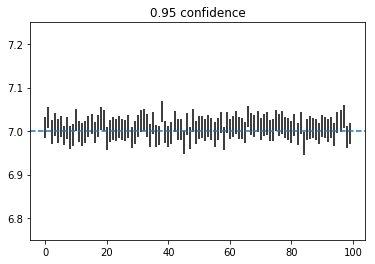

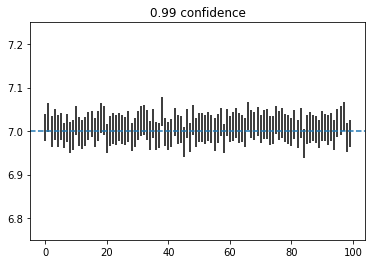

In [14]:
plot_confidence(n=300, xm = XM, alpha = 7)

In the majority of times, the actual parameter falls within the confidence interval.